In [27]:

import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle # this function has to be in the same directory!
# pip install finta!!! the only site that has inverse fisher transform!


In [28]:
symbol ="AMD"
num_name= symbol.split(' ') 
data_frames_separate = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2018-9-01",end="2019-04-05")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        data_frames_separate.append(data)

data_frames_separate[0]

,Date,Open,High,Low,Close
Date,,,,,
2018-08-31,17774.0,24.889999,25.240000,24.719999,25.170000
2018-09-04,17778.0,25.620001,28.110001,25.570000,28.059999
2018-09-05,17779.0,29.410000,29.940001,26.840000,28.510000
2018-09-06,17780.0,28.120001,28.580000,27.190001,27.840000
2018-09-07,17781.0,26.959999,28.270000,26.799999,27.379999
...,...,...,...,...,...
2019-03-29,17984.0,25.580000,25.730000,25.250000,25.520000
2019-04-01,17987.0,26.420000,26.559999,25.830000,26.360001
2019-04-02,17988.0,26.510000,26.799999,26.090000,26.750000


In [35]:
def plot_all(num):
  fig, ax = plt.subplots(figsize=(12,7))

#   candlestick_ohlc(ax,data_frames_separate[num].values,width=0.6, \
#                    colorup='green', colordown='red', alpha=0.8)

  #data_frames_separate[0]["Close"] # THIS IS A SERIES OBJECT THOUGH 
    # TURN A SERIES OBJECT INTO DATA FRAME!
  #df=df.to_frame()
  plt.plot(range(len(data_frames_separate[0])),data_frames_separate[0]["Close"])
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  plt.title(num_name[num])
  fig.tight_layout()

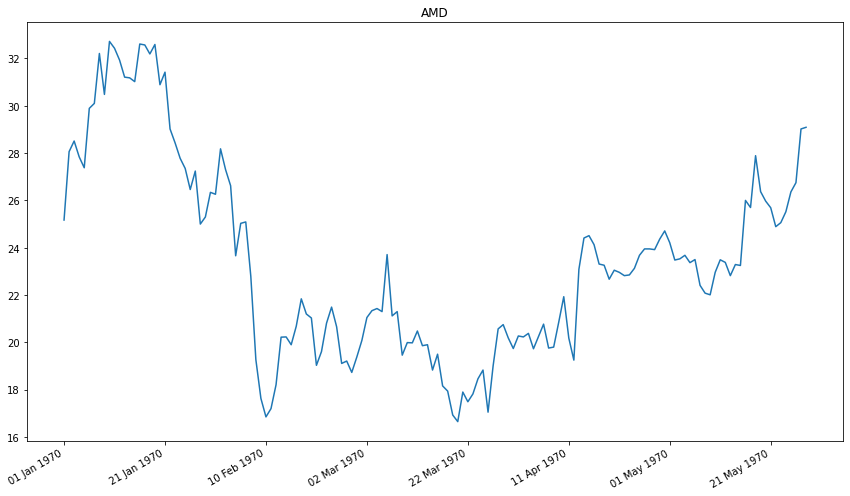

In [36]:
plot_all(0)

In [11]:
def plot_all(num):
    fig, ax = plt.subplots(figsize=(12,7))

#   candlestick_ohlc(ax,data_frames_separate[num].values,width=0.6, \
#                    colorup='green', colordown='red', alpha=0.8)

    df= data_frames_separate[0]["Close"] # THIS IS A SERIES OBJECT THOUGH 
        # TURN A SERIES OBJECT INTO DATA FRAME!
      #df=df.to_frame()
    #plt.plot(range(len(df)),df)
    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    plt.title(num_name[num])
    fig.tight_layout()

    exp1 = data_frames_separate[0]["Close"].ewm(span=12, adjust=False).mean()
    exp2 = data_frames_separate[0]["Close"].ewm(span=26, adjust=False).mean()
    macd = exp1-exp2
    exp3 = macd.ewm(span=9, adjust=False).mean()
    plt.plot(range(len(data_frames_separate[0])), macd, label='AMD MACD', color = '#EBD2BE')
    plt.plot(range(len(data_frames_separate[0])), exp3, label='Signal Line', color='#E5A4CB')
    plt.legend(loc='upper left')
    plt.show()

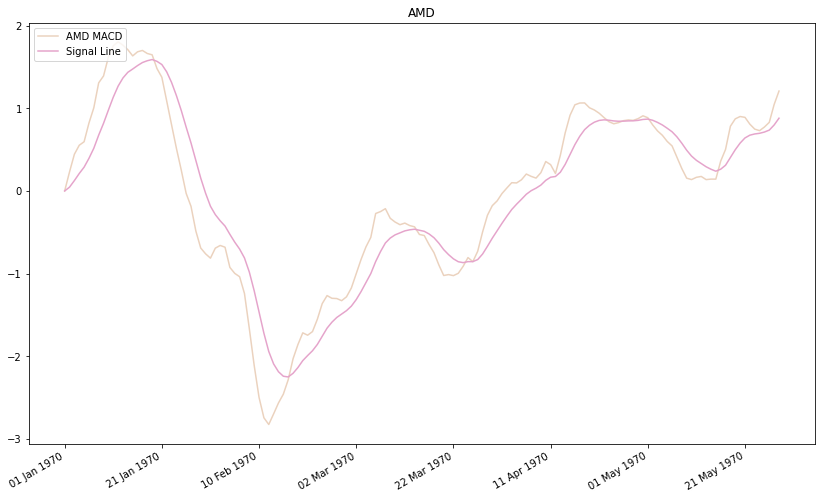

In [12]:
plot_all(0)

In [13]:
def plot_all(num):
    fig, ax = plt.subplots(figsize=(12,7))

#   candlestick_ohlc(ax,data_frames_separate[num].values,width=0.6, \
#                    colorup='green', colordown='red', alpha=0.8)

    df= data_frames_separate[0]["Close"] # THIS IS A SERIES OBJECT THOUGH 
        # TURN A SERIES OBJECT INTO DATA FRAME!
      #df=df.to_frame()
    plt.plot(range(len(df)),df)
    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    plt.title(num_name[num])
    fig.tight_layout()

    exp1 = data_frames_separate[0]["Close"].ewm(span=12, adjust=False).mean()
    exp2 = data_frames_separate[0]["Close"].ewm(span=26, adjust=False).mean()
    macd = exp1-exp2
    exp3 = macd.ewm(span=9, adjust=False).mean()
    
    plt.plot(range(len(data_frames_separate[0])), macd, label='AMD MACD', color = '#EBD2BE')
    plt.plot(range(len(data_frames_separate[0])), exp3, label='Signal Line', color='#E5A4CB')
    plt.legend(loc='upper left')
    plt.show()
    
#     exp1 = data_frames_separate[0]["Close"].ewm(span=12, adjust=False).mean()    
#     exp2 = data_frames_separate[0]["Close"].ewm(span=26, adjust=False).mean()
#     macd = exp1-exp2
#     exp3 = data_frames_separate[0]["Close"].ewm(span=9, adjust=False).mean()
    
#     plt.plot(range(len(data_frames_separate[0]),data_frames_separate[0]["Close"], label='AMD')
#     plt.plot(range(len(data_frames_separate[0]), macd, label='AMD MACD', color='orange')
#     plt.plot(range(len(data_frames_separate[0]), exp3, label='Signal Line', color='Magenta')
#     plt.legend(loc='upper left')
#     plt.show()

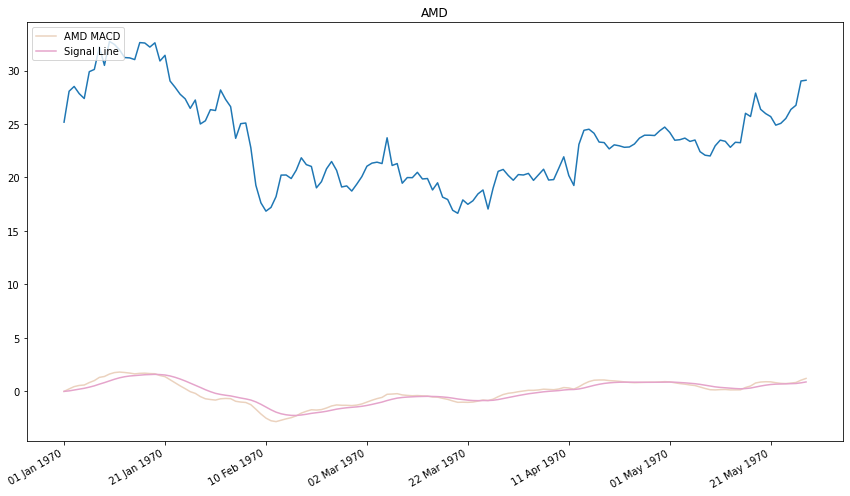

In [14]:
plot_all(0)

In [15]:
def plot_all(num):
    fig, ax = plt.subplots(figsize=(12,7))

#   candlestick_ohlc(ax,data_frames_separate[num].values,width=0.6, \
#                    colorup='green', colordown='red', alpha=0.8)

    df= data_frames_separate[0]["Close"] # THIS IS A SERIES OBJECT THOUGH 
        # TURN A SERIES OBJECT INTO DATA FRAME!
      #df=df.to_frame()
    plt.plot(range(len(df)),df)
    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    plt.title(num_name[num])
    fig.tight_layout()

#     exp1 = data_frames_separate[0]["Close"].ewm(span=12, adjust=False).mean()
#     exp2 = data_frames_separate[0]["Close"].ewm(span=26, adjust=False).mean()
#     macd = exp1-exp2
#     exp3 = macd.ewm(span=9, adjust=False).mean()
    
#     plt.plot(range(len(data_frames_separate[0])), macd, label='AMD MACD', color = '#EBD2BE')
#     plt.plot(range(len(data_frames_separate[0])), exp3, label='Signal Line', color='#E5A4CB')
#     plt.legend(loc='upper left')
#     plt.show()
    
    exp1 = data_frames_separate[0]["Close"].ewm(span=12, adjust=False).mean()    
    exp2 = data_frames_separate[0]["Close"].ewm(span=26, adjust=False).mean()
    macd = exp1-exp2
    exp3 = data_frames_separate[0]["Close"].ewm(span=9, adjust=False).mean()
    
    plt.plot(range(len(data_frames_separate[0])),data_frames_separate[0]["Close"], label='AMD')
    plt.plot(range(len(data_frames_separate[0])), macd, label='AMD MACD', color='orange')
    plt.plot(range(len(data_frames_separate[0])), exp3, label='Signal Line', color='Magenta')
    plt.legend(loc='upper left')
    plt.show()

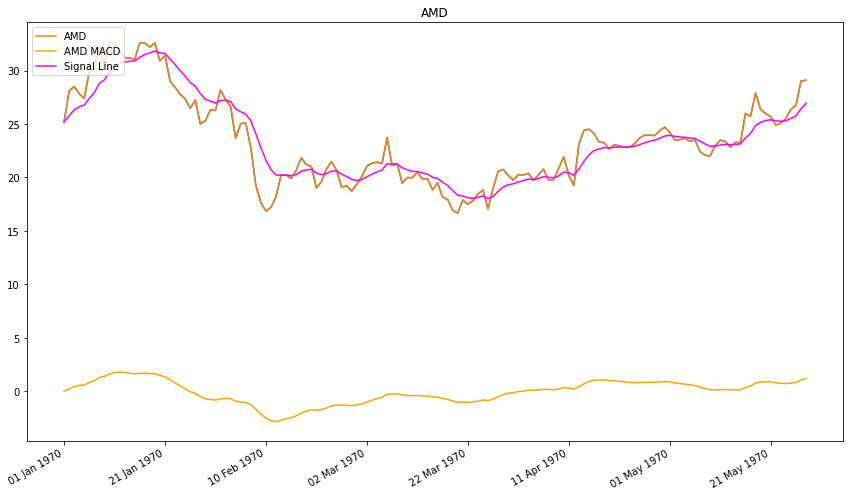

In [16]:
plot_all(0)

In [17]:
def plotMACD(num):
    
      fig = plt.figure(figsize=(12,8))
      gs = gridspec.GridSpec(2, 1, height_ratios = [2,1]) 
      ax_stock= plt.subplot(gs[0])    
      plt.title(num_name[num])

      candlestick_ohlc(ax_stock,data_frames_separate[num].values,width=0.6, \
                       colorup='green', colordown='red', alpha=0.8)

      ax_MACD= plt.subplot(gs[1])
 

      exp1 = data_frames_separate[0]["Close"].ewm(span=12, adjust=False).mean()    
      exp2 = data_frames_separate[0]["Close"].ewm(span=26, adjust=False).mean()
      macd = exp1-exp2
      exp3 = data_frames_separate[0]["Close"].ewm(span=9, adjust=False).mean()

      plt.plot(range(len(data_frames_separate[0])),data_frames_separate[0]["Close"], label='AMD')
      plt.plot(range(len(data_frames_separate[0])), macd, label='AMD MACD', color='orange')
      plt.plot(range(len(data_frames_separate[0])), exp3, label='Signal Line', color='Magenta')
      plt.legend(loc='upper left')

  #legend_labels= ["overbought", "oversold","rsi"]
  #ax_MACD.legend(legend_labels,loc = 2)

      date_format = mpl_dates.DateFormatter('%d %b %Y')
      ax_MACD.xaxis.set_major_formatter(date_format)
      fig.autofmt_xdate()
      fig.tight_layout()
      ax_stock.grid()
      #ax_rsi.grid()
    # Removing the date labels and ticks from the price subplot:
      ax_stock.get_xaxis().set_visible(False)
    # Removing the gap between the plots:
      fig.subplots_adjust(hspace=0)
    # Adding a horizontal line at the zero level in the ROC subplot:
      ax_MACD.axhline(20, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)
    # We can add labels to both vertical axis:
      ax_stock.set_ylabel("Price ($)")
      ax_MACD.set_ylabel("MACD")



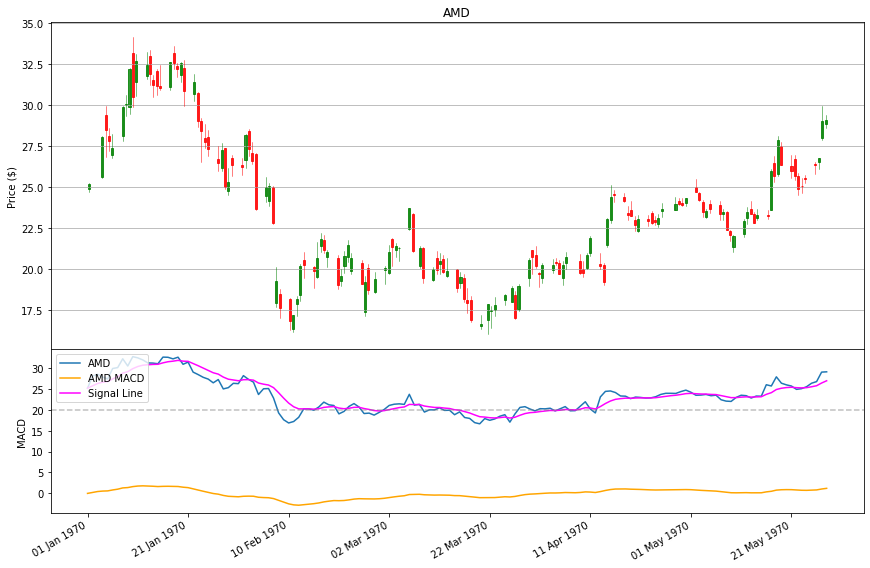

In [18]:
plotMACD(0)